# COMPUTER ASSIGNMENT 03
This assignment is intended to review 
- the concepts related to image resizing, by asking you to generate a **pyramid representation**
- multiresolution representation using pyramid
- multiresolution representation using **wavelet transforms**
- compare the **representation efficiency** of pyramid vs. wavelet 
- compare the **denoising** performance of different methods

## PART 1

### For your test image, please choose an image with good amount of detail and dynamic range. You can find some good test images to choose from, in the Kodak Image dataset on NYU Classes Resources folder.

**a)**  Pyramid generation, reconstruction, and representation efficiency.
Write a function that can simultaneously generate a 3-level Gaussian and a Laplacian Pyramid for a given image. You could use the cv2.resize( ) function, both for down-sampling, and for up-sampling. Use “INTER_LINEAR” for down-sampling filter; use “INTER_CUBIC” for up-sampling filter.

**b)**  Write a function that can reconstruct an image from the Laplacian pyramid. 

**c)**  Write a function that
**i)** reads a gray scale image (or using only the luminance component of a color image), **ii)** generate the Gaussian and Laplacian pyramids using the function from part a); **iii)** Quantize the pixels in the Laplacian pyramid with a quantization stepsize Q. The dequantized value for a pixel in the Laplacian pyramid with value f can be determined from

Q(f)=floor( (f-mean+Q/2)/Q) *Q+mean

You can assume mean = 0 for the Laplacian images and mean = 128 for the very top image of the pyramid.
**iv)** Count the number of non-zero pixels in the pyramid after quantization; **v)** reconstruct the image from the quantized Laplacian pyramid using the function from part b); **vi)** Compute the PSNR between the reconstructed image and the original image using
PSNR (dB)=10 log_10 ( 255^2/MSE), where MSE is the mean of the squared error between original and reconstructed pixels.
The function should take the image and quantization stepsize as input, and return the reconstructed image, the number of non-zeros and PSNR of the reconstructed image.

**d)**  Write a main program that reads in an image, and calls the function in part c) repeatedly with different values for Q, with Q=2^n, n=0,1,…,8 and plot a curve of PSNR vs number of non-zeros. Such a curve evaluates the representation efficiency of the Laplacian pyramid. Here we use the number of non-zeros as a surrogate for the number of bits needed to describe the non-zero coefficients. 

**Note: If your functions from part (a) and (b) are not working, you can use other python built in functions to solve (c) and (d)**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import pywt
%matplotlib inline

### PART 1

In [ ]:
# Generate the Gaussian and Laplacian pyramids for the image
# INPUT: image
# OUTPUT:  Gaussian and Laplacian pyramids
def pyramid(img):

    gp = []  # Store the Gaussian pyramid
    lp = []  # Store the Laplacian pyramid
    ##########################################    [TODO]    ##########################################
    # Use cv2.resize() to get the Gaussian Pyramid
    scale_percent = 50 # percent of original size
    
    #print('Original Image shape: ', img.shape)
    

    # Level 0
    g1 = img # bottom level
    #print('Bottom Level Image shape: ', g1.shape)
    gp.append(g1)

    # Level 1
    width1 = int(g1.shape[1] * scale_percent / 100)
    height1 = int(g1.shape[0] * scale_percent / 100)
    dim1 = (width1, height1)
    g2 = cv2.resize(g1, dim1, interpolation = cv2.INTER_LINEAR)       # middle level
    #print('Middle Level Image shape: ', g2.shape)
    gp.append(g2)

    # Level 2
    width2 = int(g2.shape[1] * scale_percent / 100)
    height2 = int(g2.shape[0] * scale_percent / 100)
    dim2 = (width2, height2)
    g3 = cv2.resize(g2, dim2, interpolation = cv2.INTER_LINEAR)        # top level
    #print('Top Level Image shape: ', g3.shape)
    gp.append(g3)

    ##########################################    [TODO]    ##########################################
    # Get the Laplacian Pyramid correspondingly
    scale_percent1 = 200 # percent of the input image

    width3 = int(g2.shape[1] * scale_percent1 / 100)
    height3 = int(g2.shape[0] * scale_percent1 / 100)
    dim3 = (width3, height3)
    l1a = cv2.resize(g2, dim3, interpolation = cv2.INTER_CUBIC)
    #print('Bottom Level Interpolated Image shape: ', l1a.shape)
    l1 = g1 - l1a                            # bottom level
    lp.append(l1)

    width4 = int(g3.shape[1] * scale_percent1 / 100)
    height4 = int(g3.shape[0] * scale_percent1 / 100)
    dim4 = (width4, height4)
    l2a = cv2.resize(g3, dim4, interpolation = cv2.INTER_CUBIC)
    #print('Middle Level Interpolated Image shape: ', l2a.shape)
    l2 = g2 - l2a                             # middle level
    lp.append(l2)

    #width5 = int(g3.shape[1] * scale_percent1 / 100)
    #height5 = int(g3.shape[0] * scale_percent1 / 100)
    #dim5 = (width5, height5)
    #l3a = cv2.resize(g3, dim5, interpolation = cv2.INTER_CUBIC)
    #print('Top Level Interpolated Image shape: ', l3a.shape)
    l3 = g3                            # top level
    lp.append(l3)
    # RETURN GAUSSIAN AND LAPLACIAN PYRAMID 
    return np.array(gp), np.array(lp)

In [ ]:
# reconstruct the image from Laplacian Pyramid
# INPUT: Laplacian pyramid
# OUTPUT:  reconstructed image
def reconstruct_lp(lp):
    ##########################################    [TODO]    ##########################################
    # reconstruct the image from the Laplacian pyramid
    # Use cv2.resize() to upsample the pyramid
    scale_percent = 200

    width = int(lp[2].shape[1] * scale_percent / 100)
    height = int(lp[2].shape[0] * scale_percent / 100)
    dim = (width, height)
    reconstructed_g2a = cv2.resize(lp[2], dim, interpolation = cv2.INTER_CUBIC) 
    reconstructed_g2 = lp[1] + reconstructed_g2a

    width1 = int(reconstructed_g2.shape[1] * scale_percent / 100)
    height1 = int(reconstructed_g2.shape[0] * scale_percent / 100)
    dim1 = (width1, height1)
    reconstructed_g1 = cv2.resize(reconstructed_g2, dim1, interpolation = cv2.INTER_CUBIC) 

    width2 = int(reconstructed_g1.shape[1] * scale_percent / 100)
    height2 = int(reconstructed_g1.shape[0] * scale_percent / 100)
    dim2 = (width2, height2)
    reconstructed_img = reconstructed_g1 + lp[0]

    # Return the reconstructed image
    return reconstructed_img

MSE of the unquantized pyramid and the original :  0.0


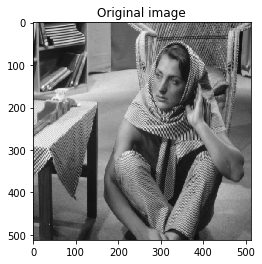

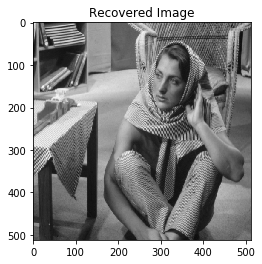

In [ ]:
# Test your pyramid() and reconstruct_lp() here
##########################################    [TODO]    ##########################################
# Read in an image 
file_name = 'barbara.jpg'# SPECIFY YOUR IMAGE FILE NAME
image = cv2.imread(file_name,0) # Grayscale image
# Generate the Gaussian and Laplacian pyramid of the image by using pyramid()
gp, lp = pyramid(image)

# Reconstruct the image from Laplacian pyramid, No quantization
rec_img = reconstruct_lp(lp)
##########################################    [TODO]    ##########################################
# Plot the reconstructed image and the original image
plt.figure(1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.figure(2)
plt.imshow(rec_img,cmap='gray')
plt.title('Recovered Image')
# What is the mean-square-error between reconstruction from the unquantized pyramid and original?
# Calculate and print MSE here:
MSE1 = np.mean((image-rec_img)**2)
print('MSE of the unquantized pyramid and the original : ', MSE1)

In [ ]:
# Perform quantization to the image with quantization step Q
# INPUT: image name and quantization step Q
# OUTPUT: reconstructed image after quantization, number of non-zeros in Laplacian pyramid, PSNR
def quantize(img, Q):
    # Generate the Gaussian and Laplacian pyramids using your pyramid() function
    gp, lp = pyramid(img)
    num = 0 # Number of non-zeros of the quantized Laplacian pyramid
    ##########################################    [TODO]    ##########################################
    # Quantize the pixel values in the Laplacian pyramid with a quantization step Q
    # Assume that for the top level, mean = 128. For the other levels, mean = 0
    # And count the number of non-zero pixels in the pyramid after quantization
    # You can use np.count_nonzero() to count the number of non-zero elements in an array
    quantized_lp = []
    q1 = np.floor( (lp[0]- 0 +Q/2)/Q) * Q + 0
    quantized_lp.append(q1)

    q2 = np.floor( (lp[1]- 0 +Q/2)/Q) * Q + 0
    quantized_lp.append(q2)

    q3 = np.floor( (lp[2]- 128 +Q/2)/Q) * Q + 128
    quantized_lp.append(q3)
    
    num=0
    for i in range(len(quantized_lp)-1):
      sum1 = np.count_nonzero(quantized_lp[i])
      num = sum1 + num

    ##########################################    [TODO]    ##########################################
    # Reconstruct the image with the quantized Laplacian Pyramid
    reconstructed_image_quant = reconstruct_lp(quantized_lp)

    ##########################################    [TODO]    ##########################################
    # Calculate MSE and PSNR of the reconstructed image
    MSE = np.mean((img-reconstructed_image_quant)**2)
    psnr = 10 * math.log(((255*255)/MSE),10)
    # RETURN RECONSTRUCTED IMAGE, NUMBER OF NON-ZEROS AND PSNR
    return reconstructed_image_quant, num , psnr

Text(0, 0.5, 'PSNR')

<Figure size 432x288 with 0 Axes>

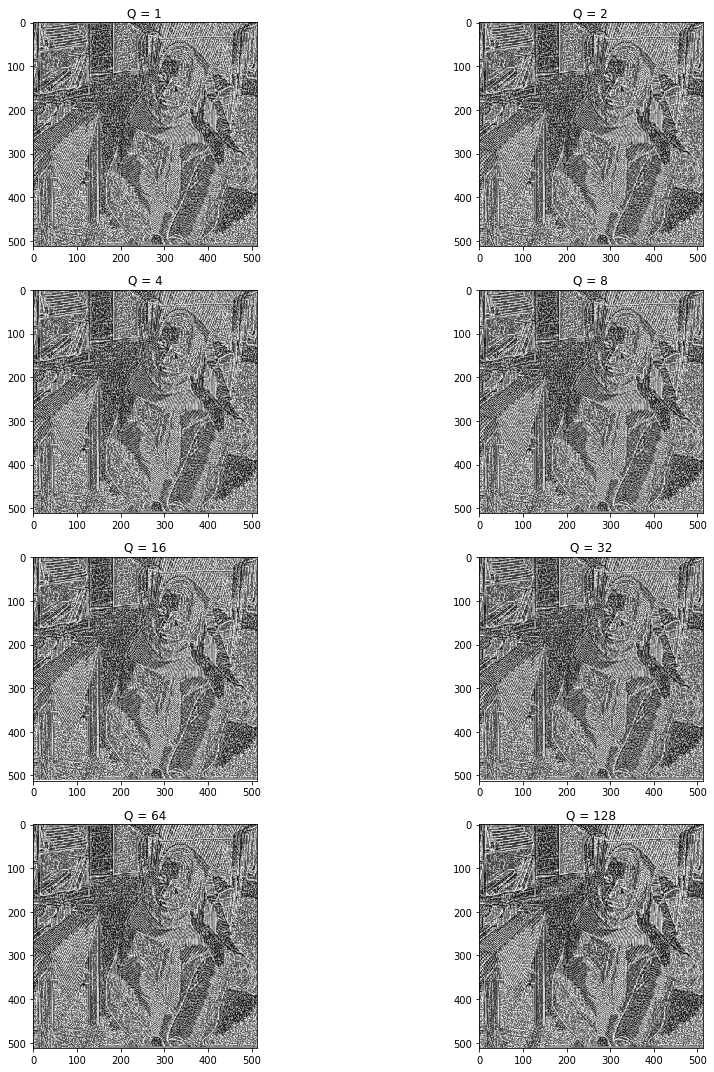

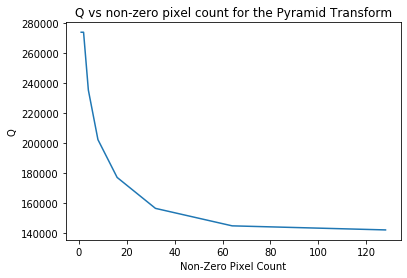

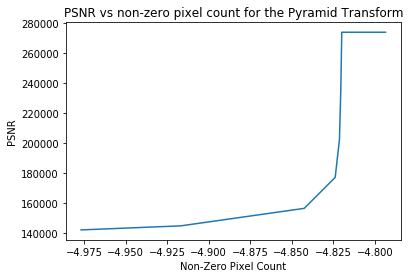

In [ ]:
# Test your quantize() function and plot the results here
##########################################    [TODO]    ##########################################
# Read in an imaage
file_name = 'barbara.jpg'
image = cv2.imread(file_name,0)
n = 8    # The level of quantization ( Q = 1, 2, 4, ... , 2^(n-1) )
rec_image_quant1 = [None]*n # List to store reconstructed images
num1 = [None]*n  # list to store number of non-zeros
psnr = [None]*n# list to store PSNR
Q = 2**np.arange(n)   # Q array ( Q = 1, 2, 4, ... , 2^(n-1) )

# Use quantize() to quantize the Laplacian pyramid of the image with Q = 1, 2, 4, ... , 2^(n-1)
for i in range(n):
    rec_image_quant1[i], num1[i], psnr[i] = quantize(image,Q[i])

num = np.array(num1)

# Display the reconstructed images for each quantization step size used
plt.figure(0)
figure, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
axes[0, 0].imshow(rec_image_quant1[0],'gray')
axes[0, 1].imshow(rec_image_quant1[1],'gray')
axes[1, 0].imshow(rec_image_quant1[2],'gray')
axes[1, 1].imshow(rec_image_quant1[3],'gray')
axes[2, 0].imshow(rec_image_quant1[4],'gray')
axes[2, 1].imshow(rec_image_quant1[5],'gray')
axes[3, 0].imshow(rec_image_quant1[6],'gray')
axes[3, 1].imshow(rec_image_quant1[7],'gray')

axes[0, 0].set_title("Q = 1")
axes[0, 1].set_title("Q = 2")
axes[1, 0].set_title("Q = 4")
axes[1, 1].set_title("Q = 8")
axes[2, 0].set_title("Q = 16")
axes[2, 1].set_title("Q = 32")
axes[3, 0].set_title("Q = 64")
axes[3, 1].set_title("Q = 128")

figure.tight_layout()

# # plot Q vs non-zero pixel count
plt.figure(2)
plt.plot(Q,num)
plt.title('Q vs non-zero pixel count for the Pyramid Transform')
plt.xlabel('Non-Zero Pixel Count')
plt.ylabel('Q')

# Plot the curve of psnr vs number of non-zeros
plt.figure(3)
plt.plot(psnr,num)
plt.title('PSNR vs non-zero pixel count for the Pyramid Transform')
plt.xlabel('Non-Zero Pixel Count')
plt.ylabel('PSNR')


## PART 2
**a)** Write a function that can generate a 3-level wavelet transform of an image. You could use the function pywt.dwt2( ) to generate one-level wavelet decomposition. Choose Daubechies (db) wavelet and “symmetric” for boundary treatment. Ideally you would organize your data so that all the wavelet subimages together are stored in a 2D arrange as the original image. 

**b)** Write a function that can reconstruct the original image from its wavelet transform subimages. You can use the function pywt.idwt2( ).

**c-d)** Repeat c-d) for Prob. 1 but on the wavelet subimages. 

**Note: If your functions from part (a),(b) are not working, you can use pywt.wavedec2() to generate the wavelet coefficients and pywt.waverec2() to reconstruct the image for part (c),(d)**

**Please note the wavelet coefficients returned by pywt.wavedec2() function are stored in a different structure as the gen_wavelet( ) function defined here. You would need to modify the quant_wavelet function properly.**

In [ ]:
# Generate the wavelet coefficients for the image
# INPUT : 2D NP ARRAY REPRESENTING THE IMAGE
# OUTPUT : WAVELET COEFFICIENTS 

# NOTE: THE WAVELET COEFFICIENTS SHOULD BE RETURNED IN THE FORM OF A LIST SHOWN BELOW
# [[SMALL SCALE REPRESENTATITON OF IMAGE,[LIST OF LEN 3 LEVEL 3 REPRESENTATION OF IMAGE]],[LIST OF LEN 2 LEVEL 2 COEFFICIENTS],[LIST OF LEN 3 LEVEL 1 COEFFICIENTS]]
def gen_wavelet(img):
    levels = 3
    img_wavlets = [None]*levels
    temp = img
    # padding zeros to make the dimensions even
    for i in range(levels-1,-1,-1):
        r,c = temp.shape
        if c%2 != 0:
          temp = np.hstack((temp,np.zeros((r,1))))
          c = c+1
        ##########################################    [TODO]    ##########################################
        # Similarly do it for rows
        if r%2 !=0:
          temp = np.vstack((temp,np.zeros((1,c))))
        ##########################################    [TODO]    ##########################################
        # call the dwt2 function to generate wavelet coefficients, use 'db1', 'symmetric'
        temp, [B,C,D] = pywt.dwt2(temp, 'db1', mode='symmetric')
        ##########################################    [TODO]    ##########################################
        # Store B,C,D in the structure shown above
        img_wavlets[i] = [B,C,D]
    img_wavlets[0] = [temp,img_wavlets[0]]
    return img_wavlets

In [ ]:
# Function used purely to display the coefficients of the wavelet transform
# Stack all the wavelet subimages together in the shape of the original image.
def wv_stack(ls):
    for i in range(len(ls)):
        if i == 0:
            A,[B,C,D] = ls[i]
            A = np.abs(A/np.amax(A))*255
            B = np.abs(B/np.amax(B))*255
            C = np.abs(C/np.amax(C))*255
            D = np.abs(D/np.amax(D))*255
            H1 = np.hstack((A,B))
            H2 = np.hstack((C,D))
            temp = np.vstack((H1,H2))
        else:
            [B,C,D] = ls[i]
            B = np.abs(B/np.amax(B))*255
            C = np.abs(C/np.amax(C))*255
            D = np.abs(D/np.amax(D))*255
            r,c = temp.shape
            r1,c1 = B.shape
            if r1 != r:
                temp = temp[:-1,:]
            if c1 != c:
                temp = temp[:,:-1]
            H1 = np.hstack((temp,B))
            H2 = np.hstack((C,D))
            temp = np.vstack((H1,H2))
    return temp

In [ ]:
# reconstruct the image from the wavelet coeffcients
# INPUT: WAVELET COEFFICIENTS IN THE FORM AS MENTIONED IN THE GEN_WAVELET FUNCTION
# OUTPUT: RECONSTRUCTED IMAGE
def gen_iwavelet(coeff):
    temp = pywt.idwt2(coeff[0],'db1','symmetric') # inverse wavelet transform for level 3 [A,(B,C,D)] to get A for next level
    for lv in coeff[1:]:
        ##########################################    [TODO]    ##########################################
        # Write code segment to make sure the image reconstruction(temp) is of the same size as the coefficients on one higher level
        # The temp variable generated above may not have the same dimension as the higher level wavelet coefficients.
        # run an if statement to verify if temp.shape == lv.shape 
        
        temp = (temp,lv) # pywt.idwt2() takes in coefficients in the form of [A,(B,C,D)]
        ##########################################    [TODO]    ##########################################
        # Perform inverse wavelet transform on [A,(B,C,D)] to get the A for next level
        temp = pywt.idwt2(temp,'db1','symmetric')
    return temp   

In [ ]:
# function to calculate the psnr
# input : #1- noisy image , #2- original image as reference
# OUTPUT: PSNR value
def calc_psnr(img,ref):
    ##########################################    [TODO]    ##########################################
    # Write the code to find the psnr
    MSE = np.mean((np.abs(img-ref))**2)
    psnr = 10 * math.log(((255*255)/MSE),10)
    
    return psnr

In [ ]:
def quantize_wavelet(img,Q): # image,Quantization step
    ##########################################    [TODO]    ##########################################
    # generate the wavelet coefficnets using gen_wavelet
    coeff = gen_wavelet(img)
    levels = 3
    for i in range(levels):
        if i == 0:
            mean = 128
            ##########################################    [TODO]    ##########################################
            # perform quantization using the formula provided
            coeff[i][0] = floor( (coeff[i][0]-mean+Q/2)/Q) *Q+mean
            mean = 0
            for j in range(levels):
                ##########################################    [TODO]    ##########################################
                # perform quantization using the formula provided
                coeff[i][1][j] =  floor( (coeff[i][1][j]-mean+Q/2)/Q) *Q+mean
        else:
            mean = 0
            ##########################################    [TODO]    ##########################################
            # perform quantization using the formula provided
            for j in range(levels):
                coeff[i][j] = floor( (oeff[i][j]-mean+Q/2)/Q) *Q+mean
                
    # finished quantization
    # count number of zero values
    
    
    nz_ele = 0
    ##########################################    [TODO]    ##########################################
    # Write code segment to count number of non-zero values. Use np.count_nonzero function
    for i in range(levels):
      nz_ele1 = np.count_nonzero(coeff[i])
      nz_ele = nz_ele + nz_ele1
    ##########################################    [TODO]    ##########################################
    # Reconstruct the image
    img_rec = gen_iwavelet(coeff)
    
    ##########################################    [TODO]    ##########################################
    # Make sure the reconstructed image and original are of the same shape
    print(img.shape)
    print(img_rec.shape)
    
    
    ##########################################    [TODO]    ##########################################
    # Calculate the psnr
    MSE = np.mean((img-img_rec)**2)
    psnr_val = 10 * math.log(((255*255)/MSE),10)

    return psnr_val, nz_ele, img_rec

In [ ]:
# Main function for part 2
def main2(filename):
    ##########################################    [TODO]    ##########################################
    # Read in the image
    img =cv2.imread(filename,0)

    ##########################################    [TODO]    ##########################################
    # Generate wavelet coefficients and plot the coefficients in standard form using wv_stack function
    img_wavelets = gen_wavelet(img)
    plt.figure()
    plt.imshow(img,'gray')
    plt.title('Original image')

    disp_coeff = wv_stack(img_wavelets)
    #disp_coeff = np.abs(disp_coeff/np.amax(disp_coeff))*255
    plt.figure(figsize=(10,10))
    plt.title('Wavelet Coefficients')
    plt.imshow(disp_coeff,'gray')
    

    ##########################################    [TODO]    ##########################################
    # Reconstruct the image using gen_iwavelet function and display output
    img_rec = gen_iwavelet(img_wavelets)
    plt.figure()
    plt.title('Recovered Image')
    plt.imshow(img_rec,'gray')

    ##########################################    [TODO]    ##########################################
    # Set quantization levels
    n = 8 # number of Q levels
    Q = 2**np.arange(n) # array saving quantization values
    
    Q_imgs = [None]*n # list to hold quantized images
    psnr_arr = [None]*n # list to hold the psnr values
    nz_arr = [None]*n # list to hold `non-zero element` values for different quentization levels
    ##########################################    [TODO]    ##########################################
    # Write code segment to calculate the wavelet transform for the image, quantize with different Q,
    # Add the values to the Q_imgs,psnr_arr,nz_arr lists accordingly
    for i in range(n):
      Q_imgs[i], nz_arr[i], psnr_arr[i] = quantize(image,Q[i])
    
    num_arr = np.array(nz_arr)
    psnr_arr = np.array(psnr_arr)
    ##########################################    [TODO]    ##########################################

    # plot Q vs non-zero pixel count
    plt.figure()
    plt.plot(Q,num)
    plt.title('Q vs non-zero pixel count for Wavelet Transform')
    plt.xlabel('Non-Zero Pixel Count')
    plt.ylabel('Q')
    # plot non-zero pixel count vs psnr
    plt.figure()
    plt.plot(psnr,num)
    plt.title('PSNR vs non-zero pixel count for Wavelet Transform')
    plt.xlabel('Non-Zero Pixel Count')
    plt.ylabel('PSNR')
    
    plt.figure()
    plt.imshow(img,'gray')
    plt.title('Original image')
    
    # PLotting all figures side by side with original to show the difference
    plt.figure()
    figure, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
    axes[0, 0].imshow(Q_imgs[0],'gray')
    axes[0, 1].imshow(Q_imgs[1],'gray')
    axes[1, 0].imshow(Q_imgs[2],'gray')
    axes[1, 1].imshow(Q_imgs[3],'gray')
    axes[2, 0].imshow(Q_imgs[4],'gray')
    axes[2, 1].imshow(Q_imgs[5],'gray')
    axes[3, 0].imshow(Q_imgs[6],'gray')
    axes[3, 1].imshow(Q_imgs[7],'gray')

    figure.suptitle('Quantized Images')
    axes[0, 0].set_title("Q = 1")
    axes[0, 1].set_title("Q = 2")
    axes[1, 0].set_title("Q = 4")
    axes[1, 1].set_title("Q = 8")
    axes[2, 0].set_title("Q = 16")
    axes[2, 1].set_title("Q = 32")
    axes[3, 0].set_title("Q = 64")
    axes[3, 1].set_title("Q = 128")

    figure.tight_layout()

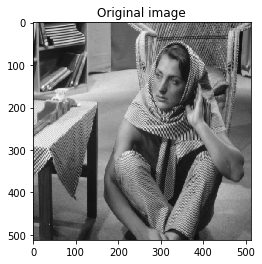

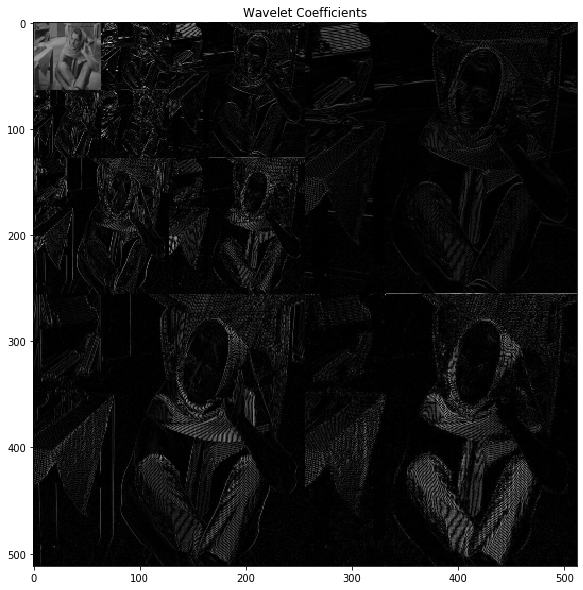

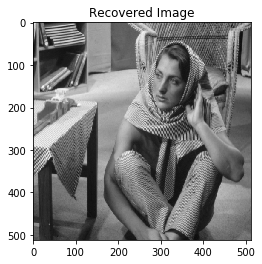

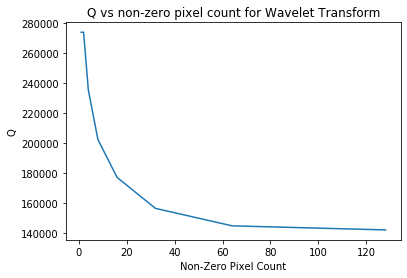

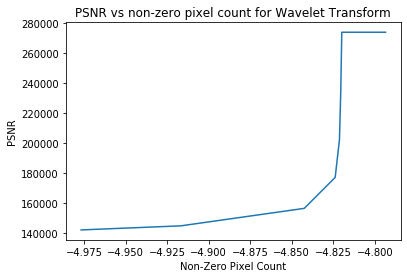

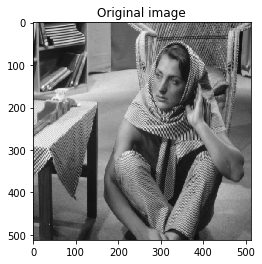

<Figure size 432x288 with 0 Axes>

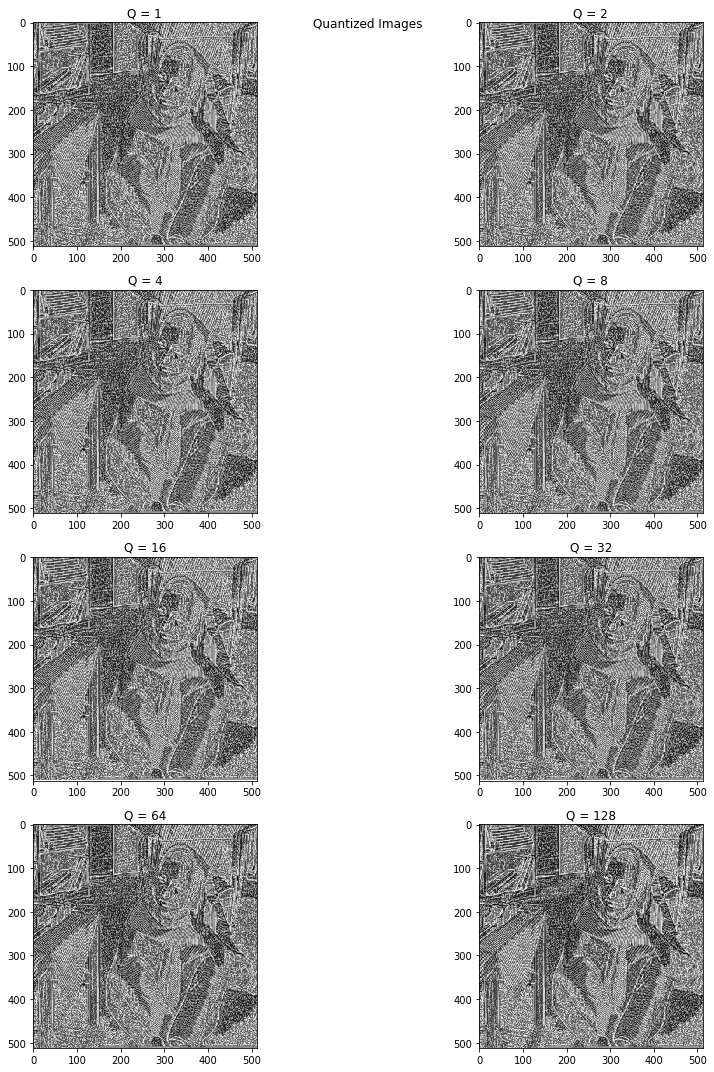

In [ ]:
# Call the main function
file_name = 'barbara.jpg' # Specify file name
main2(file_name)


# Discussion: 

Based on the results in Prob. 1(c) and 2(c), compare the representation efficiency of Laplacian pyramid vs. wavelet transform.

Laplacian
<br>
This is used for compression, redundancy removal. Downsampling and upsampling process looses a lot of information as compared to the wavelet transform.

Wavelets
<br>
It is an orthornormal transform localized in space and frequency. More desirable as it preserves values.

## PART 3
Write a main program that i) reads in an image, ii) add Gaussian random noise with a standard deviation equal to a certain percentage $N\%$ of the image's dynamic range;  iii) Generate the wavelet image using your function from Prob. 2(a); 

iv) Perform denoising using soft thresholding on  the Wavelet image. For any coefficient with value f, and a threshold T, the soft thresholded value is defined as

$soft(f,T) = \begin{cases} f - T, \text{if  } f > T\\
f + T, \text{if  }  f < -T\\
0, \text{     if  }  |f| <= T
\end{cases}$



v) Reconstruct the denoised image from the thresholded Wavelet image using your function from Prob. 2(b). 

vi) Evaluate the quality of denoising by computing the PSNR of the original image (without noise) and denoised image. 

Vii) Display the noisy and denoised image. Repeat the experiment for differnet noise levels at N = 10, 5, and 1

Recall that the threshold T should be chosen based on the noise variance and the wavelet coefficient variance, following $T =\frac{\sqrt{2}\sigma_n^{2}}{\sigma}$
, where $\sigma_n^{2}$
is the noise variance,  $\sigma^{2}$ is the variance of the noise-free wavelet coefficients (only the high band signals).  Your program should estimate the coefficient variance for each band and use the corresponding threshold when performing soft thresholding on the wavelet image. 

You can use this link to find out how to estimate $\sigma^2$ for each wavelet band:[Prof. Selesnick Notes](http://eeweb.poly.edu/iselesni/lecture_notes/SoftThresholding.pdf)

**Note: If your functions from the previous parts are not working, you can use pywt.wavedec2() to generate the wavelet coefficients and pywt.waverec2() to reconstruct the image for the following part.**

**Please note the wavelet coefficients returned by pywt.wavedec2() function are stored in a different structure as the gen_wavelet( ) function defined here. You would need to modify the wavelet_denoising function properly.**


In [ ]:
########################   [TODO]    #########################
# Write a function that given an np.array M and a threshold T, perform soft thresholding on each element in the array using T
# Check if your function was correctly implemented by running the test below.
def soft_threshold(M, T):
  for i in range(M.shape[0]):
    for j in range(M.shape[1]):
      if M[i][j] > T:
        M[i][j] = M[i][j]-T
      elif M[i][j] < -T:
        M[i][j] = M[i][j]+T
      else:
        M[i][j] = 0
  return M
  # ind1 = np.where(M > T,True,False)
  # ind2 = np.where(np.abs(M) <=T,True,False)
  # ind3 = np.where(M<-T,True,False)
  # M[ind1] = M[ind1] - T
  # M[ind2] = 0
  # M[ind3] = M[ind3] + T
  # return M

M_test = np.array([[1,3],[-4,0.1]])
print(soft_threshold(M_test,1))

[[ 0.  2.]
 [-3.  0.]]


In [ ]:
# Perform soft thresholding on the Wavelet image for performing denoising
# Input: original image, N: a value specifying percentage of the image dynamic range to be use as standard deviation of noise
# Output: noisy image and reconstructed image
def wave_denoising(img,N):  # image,noise level
    levels = 3
    DR = np.max(img) - np.min(img) # CALCULATING DYNAMIC RANGE
    
    ##########################################    [TODO]    ##########################################
    # Generate and add Gaussian random noise with a noise sigma at N percent of the image dynamic range
    sigma_n = N*0.01*DR
    n = np.random.normal(0,sigma_n,img.shape) # generate random noise
    img_n = img + n # add noise to original image

    ##########################################    [TODO]    ##########################################
    # generate wavelet coefficients using gen_wavelet function
    img_wavelets = gen_wavelet(img_n)
    THRESH = [] # defining a list to store thresholding coefficients
    #print(np.shape(img_wavelets[0][1][0]))
    # calculating coefficient based threshold
    for i in range(levels):
      if i == 0:
        A,[B,C,D] = img_wavelets[i]
        ##########################################    [TODO]    ##########################################
        # find the different sub-band thresholds using the formula specified slesnisck notes[Link specified in assignment doc.
        # Note that soft thresholding should not be done on the very top level low-frequency image.
        t_B = (np.max(np.mean(np.square(B))- (sigma_n)**2))**0.5
        t_C = (np.max(np.mean(np.square(C))- (sigma_n)**2))**0.5
        t_D = (np.max(np.mean(np.square(D))- (sigma_n)**2))**0.5
        THRESH.extend([[t_B,t_C,t_D]])
      else:
        ##########################################    [TODO]    ##########################################
        [B,C,D] = img_wavelets[i]
        t_B = (np.max(np.mean(np.square(B))- (sigma_n)**2))**0.5
        t_C = (np.max(np.mean(np.square(C))- (sigma_n)**2))**0.5
        t_D = (np.max(np.mean(np.square(D))- (sigma_n)**2))**0.5
        THRESH.extend([[t_B,t_C,t_D]])

            ##########################################    [TODO]    ##########################################
        # call soft_threshold to threshold img_wavlets[i]
        # Note that soft thresholding should not be done on the very top level low-frequency image A.
    #print(THRESH)
    #img_wavelets = [None]*levels
    #img_wavelets1[0] = img_wavelets[0]
    for i in range(levels):
      if i == 0:
        for j in range(levels):
          img_wavelets[i][1][j] = soft_threshold(img_wavelets[i][1][j], THRESH[0][j])
      else: 
        for j in range(levels):
          img_wavelets[i][j] = soft_threshold(img_wavelets[i][j], THRESH[i][j])

      
    ##########################################    [TODO]    ##########################################
    # use gen_iwavlets to recontruct the image
    # make sure the shape of the reconstructed image is the same as the original image
    img_rec = gen_iwavelet(img_wavelets)
     
    return img_n, img_rec    # return the noisy and reconstructed image
    

In [ ]:
# Display function for part 3,4
def Display(noisy, denoised):
    ################################TO DO########################### 
    # You may change this function as you see fit to accommodate your image's size, shape
    
    # calculating the psnr and print it
    PSNR_noisy = calc_psnr(img,noisy)
    print('PSNR Noisy = %d db'%PSNR_noisy)
    PSNR_denoised = calc_psnr(img,denoised)
    print('PSNR Denoised = %d db'%PSNR_denoised)

    # Display the original, noisy and denoised image 
    plt.figure(1,figsize = (10,10))
    plt.subplot(1,2,1)
    # Display the noisy and denoised image
    plt.imshow(img_noisy,'gray')
    plt.title('Noisy')
    plt.subplot(1,2,2)
    plt.imshow(denoised,'gray')
    plt.title('Reconstructed')
    plt.show()

PSNR Noisy = 21 db
PSNR Denoised = 23 db


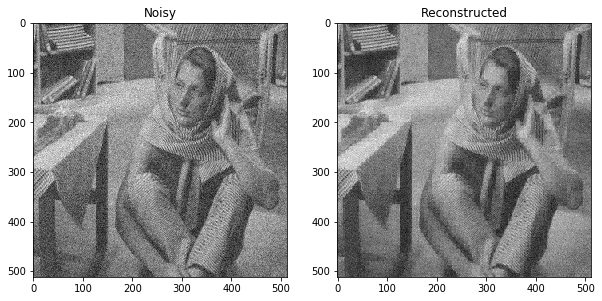

PSNR Noisy = 27 db
PSNR Denoised = 27 db


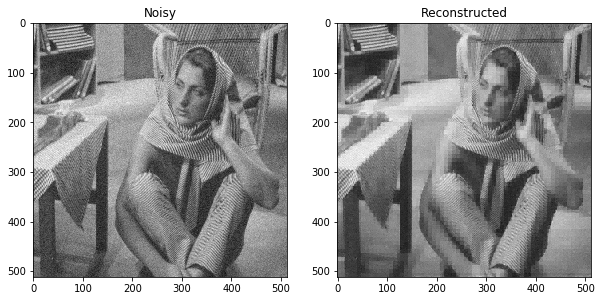

PSNR Noisy = 41 db
PSNR Denoised = 28 db


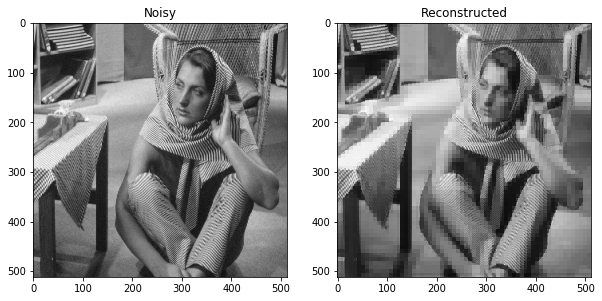

In [ ]:
file_name = 'barbara.jpg'# specify file name
img = cv2.imread(file_name,0)
############ For different noise levels and display the results ##############
for N in [10,5,1]:
    # Get noisy and denoised images
    img_noisy, img_reconstructed = wave_denoising(img,N)
    # Calling the display function
    img_thresh = Display(img_noisy, img_reconstructed)

## PART 4
 - For the same noise-added image, try to reduce the noise using the following smoothing filter and compute the PSNR between the denoised image and the original image. 
H =  [[1,2,1],[2,4,2],[1,2,1]]/16
![matrix](matrix.png)



PSNR of the filtered image and the original image is:  27.030307384406477 dB
PSNR Noisy = 21 db
PSNR Denoised = 27 db


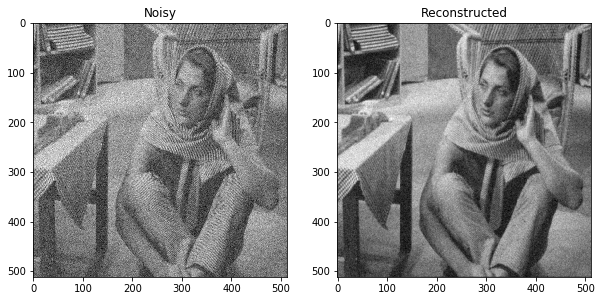

PSNR of the filtered image and the original image is:  29.338079200302914 dB
PSNR Noisy = 27 db
PSNR Denoised = 29 db


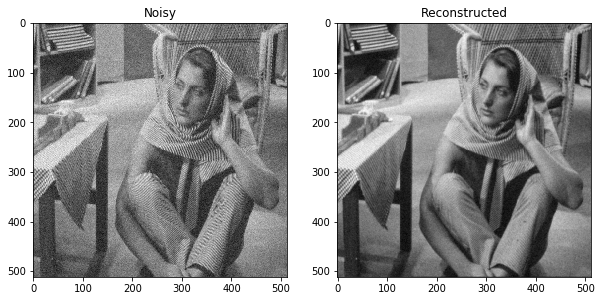

PSNR of the filtered image and the original image is:  30.421236000800373 dB
PSNR Noisy = 41 db
PSNR Denoised = 30 db


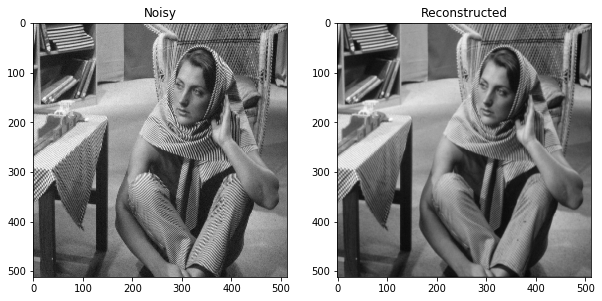

In [ ]:
## Similar function as the above, use filter to denoise
def filter_denoising(img,N):
    DR = np.max(img) - np.min(img)
    ##########################################    [TODO]    #########################################
    sigma_n = N*0.01*DR
    n = np.random.normal(0,sigma_n,img.shape)
    img_n = img +n

    ##########################################    [TODO]    #########################################
    # define the kernel and call cv2.filter2D() to reduce the noise 
    KERNEL = (1/16) * np.array([[1,2,1],[2,4,2],[1,2,1]])
    img_filt = []
    img_filt = cv2.filter2D(img_n,-1, KERNEL)

    ##########################################    [TODO]    #########################################
    # call the psnr function to find the psnr of the denoised image and print that value
    PSNR_filt = calc_psnr(img_filt,img)
    print('PSNR of the filtered image and the original image is: ',PSNR_filt,'dB')
    return img_n, img_filt

file_name = 'barbara.jpg'# specify file name
img = cv2.imread(file_name,0)

for N in [10,5,1]:
    # Get noisy and denoised images
    img_noisy, img_filt = filter_denoising(img,N)
    # Calling the display function
    Display(img_noisy, img_filt)

# Discussion: 

Based on the results in Prob. 3 and 4, compare the denoising performance of the two methods. Pay attention not only to noise suppression but also detail preserving. What are the advantages of one over the other?


Soft Thresholding and Kernal Smoothening Filter:

As the level of N reduces, the filtering becomes more smooth for both the noise suppression techniques.
For large values of N, the smoothening filter performs better than soft thresholding. But as the value of N decreases, it looks as though both the techniques perform in a similar way.


## OPTIONAL


 -  You can try different down-sampling and interpolation filters for pyramid representation; and different wavelet transforms, to see their effects on representation efficiency and denoising. You can also try different noise levels.

- Investigate the representation efficiency of block DCT (e.g. DCT over every 8x8 blocks) by following similar framework, and compare it to Wavelet and Laplacian pyramid.